In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [34]:
# Missing value handling
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median') 
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [38]:
df = X.copy()
df['target'] = data.target

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [42]:
df.describe().sum()

MedInc        20672.111943
HouseAge      20818.225044
AveRooms      20806.380644
AveBedrms     20679.124972
Population    62560.938866
AveOccup      21906.012463
Latitude      20858.157814
Longitude     19925.473827
target        20654.012764
dtype: float64

In [44]:
print(df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  target  
0        -12

In [46]:
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [50]:
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


In [52]:
df.shape

(20640, 9)

In [54]:
num_columns = df.select_dtypes(include='number')

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

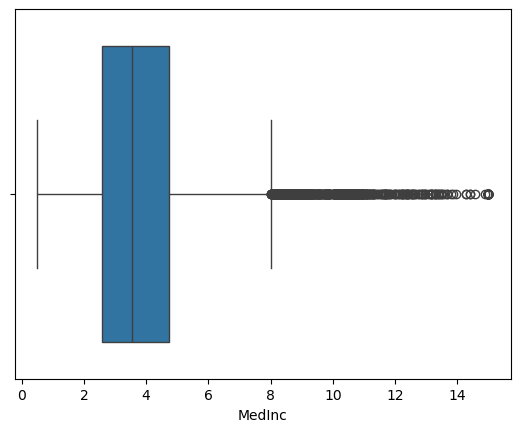

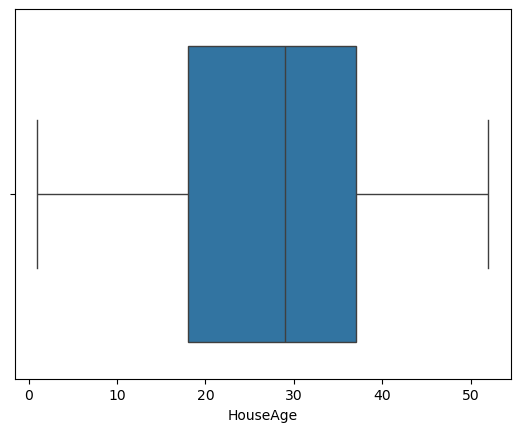

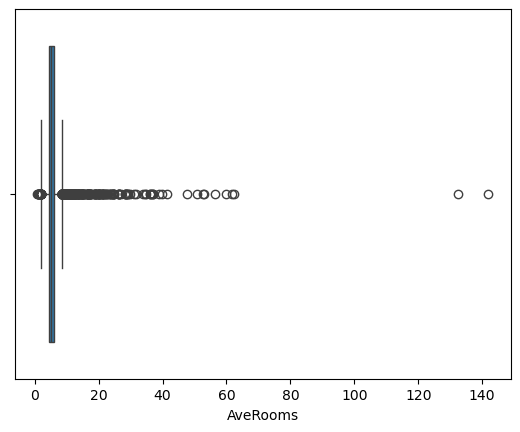

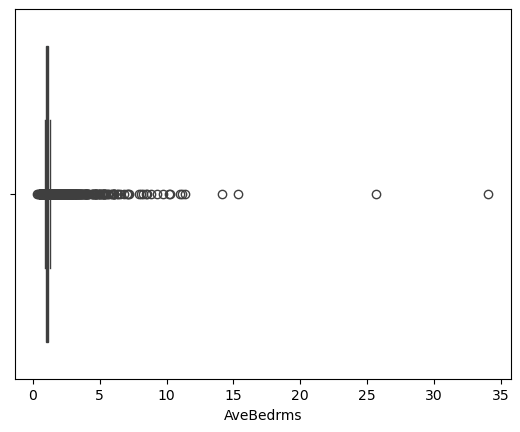

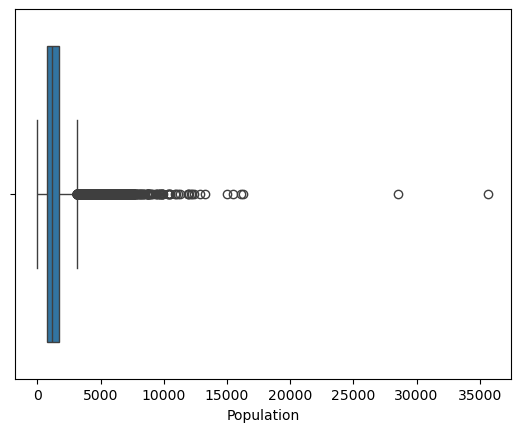

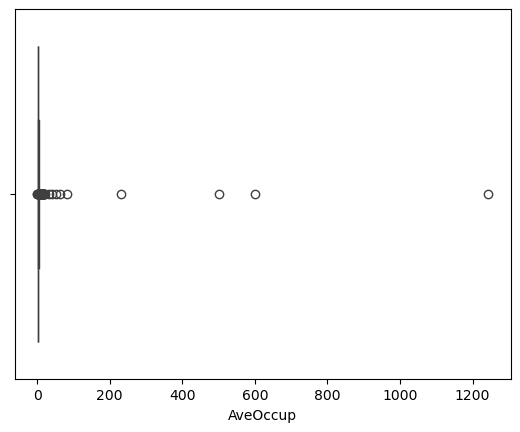

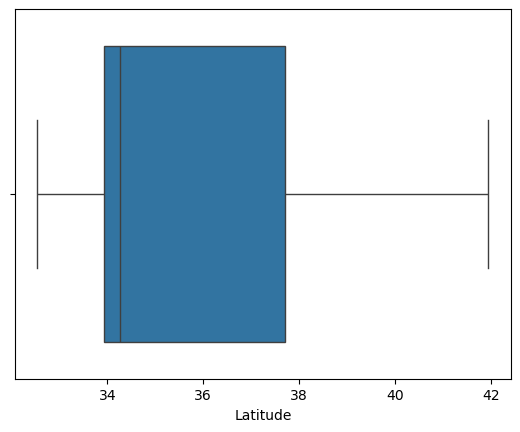

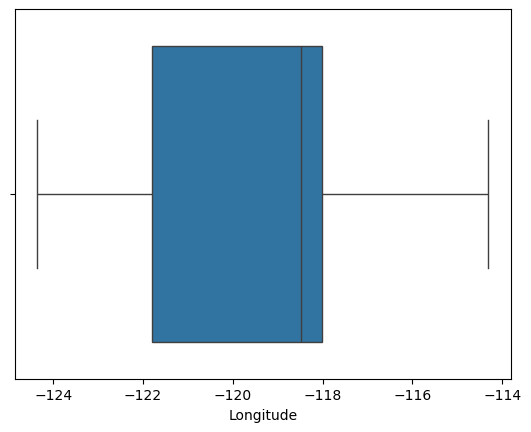

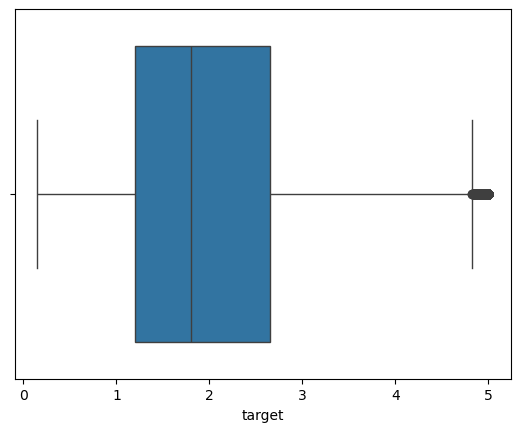

In [57]:
for i in num_columns.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [60]:
# IQR MEthod
def outliers(df):
    for col in df.select_dtypes(include=['int64','float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)
        #capping
        df[col] = df[col].apply(lambda x: lowwer if x< lower else upper if x> upper else x)
        return df

In [64]:
df1= outliers(df)


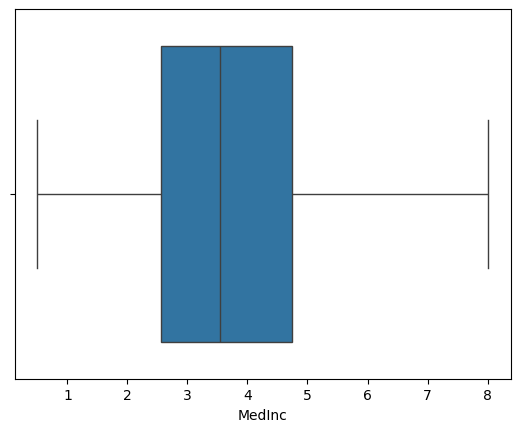

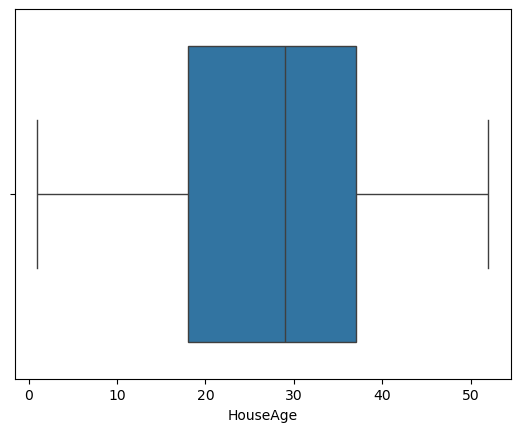

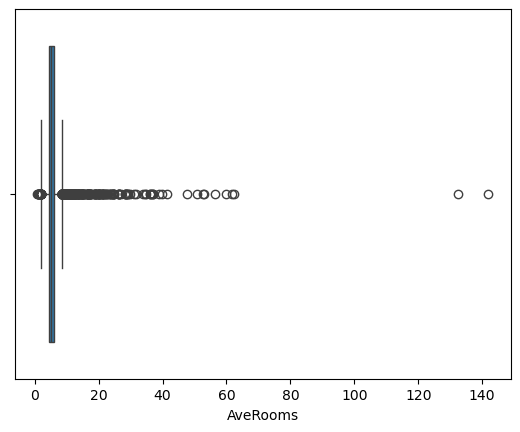

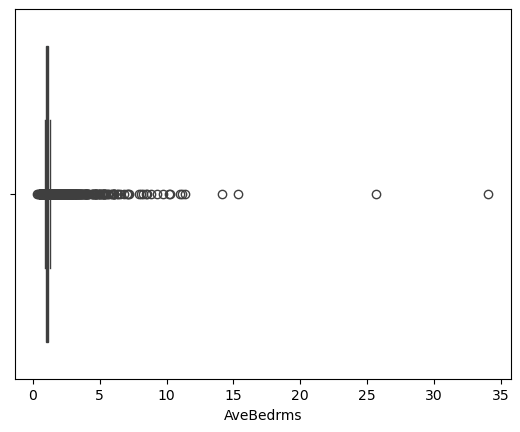

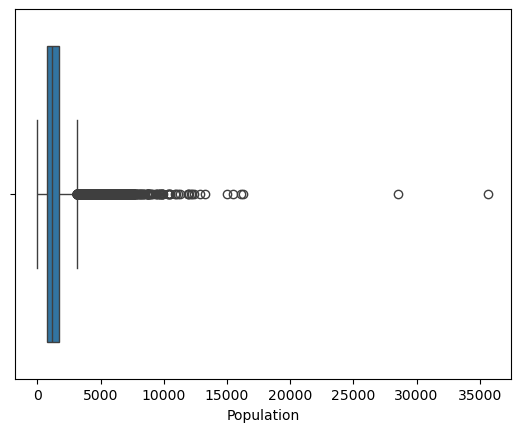

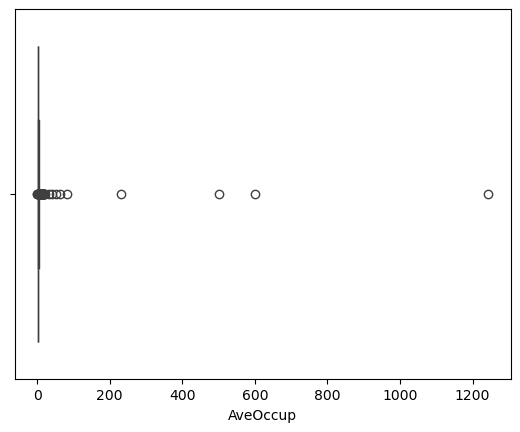

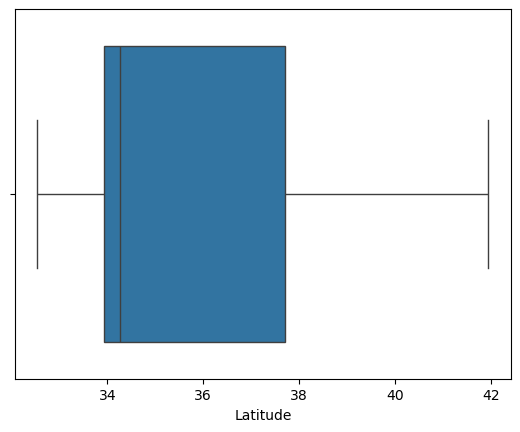

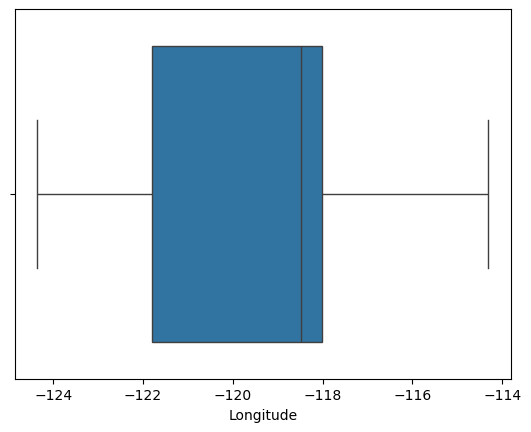

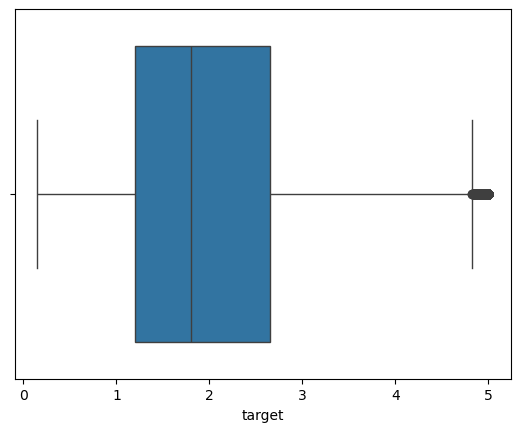

In [66]:
for i in num_columns.columns:
    sns.boxplot(data=df1,x=i)
    plt.show()


In [68]:
df.skew()

MedInc         0.735618
HouseAge       0.060331
AveRooms      20.697869
AveBedrms     31.316956
Population     4.935858
AveOccup      97.639561
Latitude       0.465953
Longitude     -0.297801
target         0.977763
dtype: float64

In [72]:
from sklearn.preprocessing import PowerTransformer

In [74]:
pt=PowerTransformer(method='yeo-johnson')

In [76]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

In [78]:
pt = PowerTransformer(method='yeo-johnson')
df[numerical_features] = pt.fit_transform(df[numerical_features])

In [80]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,2.032296,0.975968,1.106394,-0.296934,-1.619967,-0.368763,1.089037,-2.414735e-15,1.715878
1,2.032296,-0.568893,0.712367,-0.847336,1.090355,-1.186265,1.082404,-2.414735e-15,1.281389
2,1.768880,1.761010,1.673645,0.162493,-1.139853,0.005053,1.079079,-2.414735e-15,1.247506
3,1.119252,1.761010,0.461045,0.159137,-1.000270,-0.381080,1.079079,-2.414735e-15,1.188835
4,0.189397,1.761010,0.737176,0.228006,-0.985268,-1.040230,1.079079,-2.414735e-15,1.193798


In [82]:
#Feature scaling
scaler =  StandardScaler()
scaled_features = scaler.fit_transform(df.drop('target',axis=1))

In [84]:
#training and testing 
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['target'], test_size=0.2, random_state=42)

Regression Algorithm Implementation

In [86]:
# Linear Regression
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [88]:
#train the model 
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [90]:
# Predictions
y_pred_lr = lr.predict(X_test)

In [92]:
# Evaluation
print("Linear Regression Metrics:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R2:", r2_score(y_test, y_pred_lr))

Linear Regression Metrics:
MSE: 0.3309562894933431
MAE: 0.4324461252674613
R2: 0.6680705842182644


<!-- Decision Tree Regressor -->

In [94]:
from sklearn.tree import DecisionTreeRegressor

In [96]:
# Train the model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [98]:
#Predictions
y_pred_dt = dt.predict(X_test)

In [100]:
# Evaluation
print("Decision Tree Metrics:")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("R2:", r2_score(y_test, y_pred_dt))

Decision Tree Metrics:
MSE: 0.34273935451380905
MAE: 0.40056833881131787
R2: 0.6562528728995007


In [ ]:
 #Random Forest Regressor

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
# Train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [105]:
#Predictions
y_pred_rf = rf.predict(X_test)

In [106]:
# Evaluation
print("Random Forest Metrics:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R2:", r2_score(y_test, y_pred_rf))

Random Forest Metrics:
MSE: 0.17160350207314856
MAE: 0.2874884796675481
R2: 0.8278919241074408


 <!-- Gradient Boosting Regressor -->

In [107]:
from sklearn.ensemble import GradientBoostingRegressor

In [108]:
# Train the model
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [109]:
# Predictions
y_pred_gb = gb.predict(X_test)

In [110]:
# Evaluation
print("Gradient Boosting Metrics:")
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("R2:", r2_score(y_test, y_pred_gb))

Gradient Boosting Metrics:
MSE: 0.2028743071370553
MAE: 0.32877017841894257
R2: 0.7965291720298863


<!-- Support Vector Regressor -->

In [111]:
from sklearn.svm import SVR

In [112]:
# Train the model
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [113]:
# Predictions
y_pred_svr = svr.predict(X_test)

In [118]:
# Evaluation
print("SVR Metrics:")
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("R2:", r2_score(y_test, y_pred_svr))

SVR Metrics:
MSE: 0.20883026989424208
MAE: 0.3326410228540505
R2: 0.790555696676276


In [119]:
# Model Evaluation and Comparison
models = {
    "Linear Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb,
    "SVR": y_pred_svr
}

In [124]:
for model_name, predictions in models.items():
    print(f"\n{model_name} Metrics:")
    print("MSE:", mean_squared_error(y_test, predictions))
    print("MAE:", mean_absolute_error(y_test, predictions))
    print("R2:", r2_score(y_test, predictions))


Linear Regression Metrics:
MSE: 0.3309562894933431
MAE: 0.4324461252674613
R2: 0.6680705842182644

Decision Tree Metrics:
MSE: 0.34273935451380905
MAE: 0.40056833881131787
R2: 0.6562528728995007

Random Forest Metrics:
MSE: 0.17160350207314856
MAE: 0.2874884796675481
R2: 0.8278919241074408

Gradient Boosting Metrics:
MSE: 0.2028743071370553
MAE: 0.32877017841894257
R2: 0.7965291720298863

SVR Metrics:
MSE: 0.20883026989424208
MAE: 0.3326410228540505
R2: 0.790555696676276


In [125]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "SVR": SVR()
}

In [126]:
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)

In [127]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [128]:
# Evaluate models
results = {}
for name, pred in predictions.items():
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    results[name] = {"MSE": mse, "MAE": mae, "R²": r2}


In [129]:
# Display results
for name, metrics in results.items():
    print(f"{name}: MSE={metrics['MSE']:.4f}, MAE={metrics['MAE']:.4f}, R²={metrics['R²']:.4f}")

Linear Regression: MSE=0.3310, MAE=0.4324, R²=0.6681
Decision Tree Regressor: MSE=0.3360, MAE=0.3966, R²=0.6630
Random Forest Regressor: MSE=0.1715, MAE=0.2871, R²=0.8280
Gradient Boosting Regressor: MSE=0.2029, MAE=0.3288, R²=0.7965
SVR: MSE=0.2088, MAE=0.3326, R²=0.7906
